# Premier Neurone 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


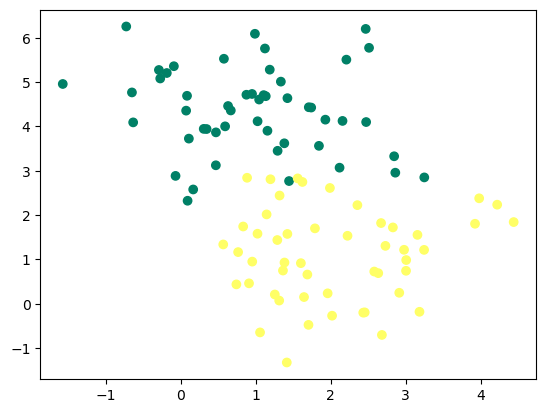

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# 2. Fonctions du modele

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b # z[i]=w1*x1+w2*x2+b
    A = 1 / (1 + np.exp(-Z)) # sortie la fonction sigmpide
    return A

In [5]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = [] # liste des valeurs de la fonction loss

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)
    

0.89


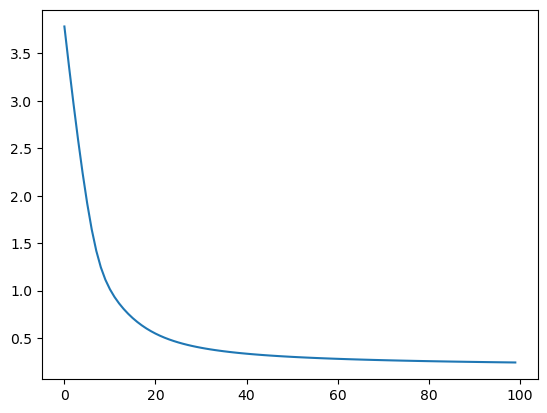

In [11]:
W, b = artificial_neuron(X, y)

# 3. Frontiere de décision

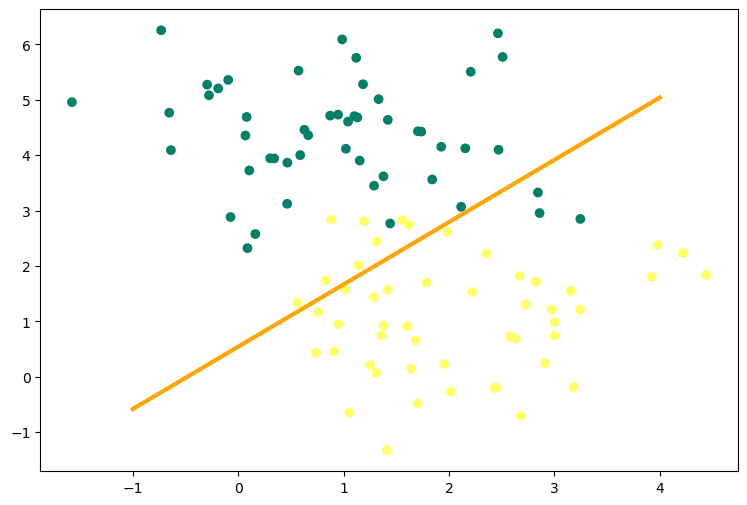

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

# Exercice - Cat vs Dog

In [16]:
#!pip install h5py # h5py vous permet d'ouvrir les fichiers au format hdf5. N'oubliez pas de l'installer !
from utilities import *

In [17]:
X_train, y_train, X_test, y_test = load_data()

In [18]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [19]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19056\233491810.py:6: UserWarning:

The figure layout has changed to tight



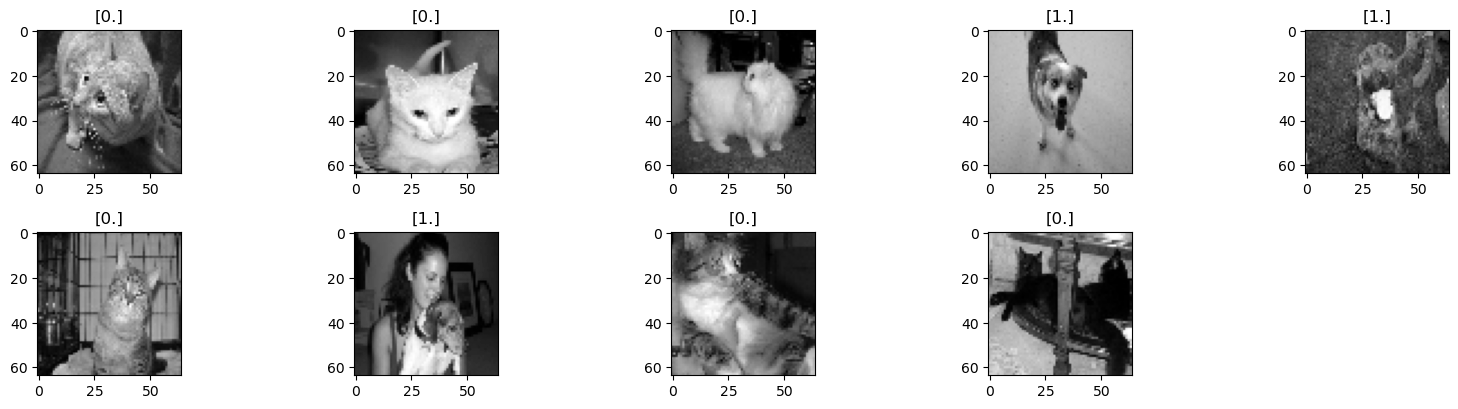

In [20]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()